In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [37]:
df=pd.read_csv("C:\\Users\\Mir Niyaz\\Documents\\heart.csv")                          

In [38]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [45]:
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

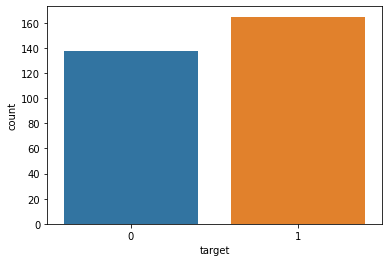

In [46]:
sns.countplot(x='target',data=df)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc=StandardScaler()
df['age'] = sc.fit_transform(df[['age']])
df['sex'] = sc.fit_transform(df[['sex']])
df['cp'] = sc.fit_transform(df[['cp']])
df['trestbps'] = sc.fit_transform(df[['trestbps']])
df['chol'] = sc.fit_transform(df[['chol']])
df['fbs'] = sc.fit_transform(df[['fbs']])
df['restecg'] = sc.fit_transform(df[['restecg']])
df['thalach'] = sc.fit_transform(df[['thalach']])
df['exang'] = sc.fit_transform(df[['exang']])
df['oldpeak'] = sc.fit_transform(df[['oldpeak']])
df['slope'] = sc.fit_transform(df[['slope']])
df['ca'] = sc.fit_transform(df[['ca']])
df['thal'] = sc.fit_transform(df[['thal']])
df['target'] = sc.fit_transform(df[['target']])

In [49]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


In [50]:
from sklearn.preprocessing import MinMaxScaler                               # Ranges from 0 to 1


In [51]:
sc=MinMaxScaler()
df['age'] = sc.fit_transform(df[['age']])
df['sex'] = sc.fit_transform(df[['sex']])
df['cp'] = sc.fit_transform(df[['cp']])
df['trestbps'] = sc.fit_transform(df[['trestbps']])
df['chol'] = sc.fit_transform(df[['chol']])
df['fbs'] = sc.fit_transform(df[['fbs']])
df['restecg'] = sc.fit_transform(df[['restecg']])
df['thalach'] = sc.fit_transform(df[['thalach']])
df['exang'] = sc.fit_transform(df[['exang']])
df['oldpeak'] = sc.fit_transform(df[['oldpeak']])
df['slope'] = sc.fit_transform(df[['slope']])
df['ca'] = sc.fit_transform(df[['ca']])
df['thal'] = sc.fit_transform(df[['thal']])
df['target'] = sc.fit_transform(df[['target']])

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [53]:
from sklearn.cluster import KMeans

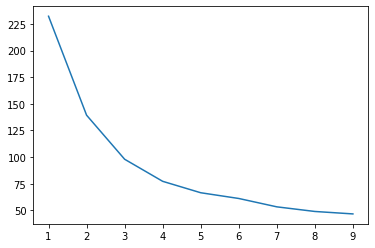

In [54]:
kval=range(1,10)
SSE=[]
for i in kval:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['age','sex','cp','trestbps','chol','thalach','oldpeak','thal','target']])
    SSE.append(kmeans.inertia_)
plt.plot(kval,SSE)

In [55]:
kmeans=KMeans(n_clusters=3)

In [56]:
y_pred=kmeans.fit_predict(df[['age','sex','cp','trestbps','chol','thalach','oldpeak','thal','target']])

In [57]:
y_pred

array([0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
df['group']=y_pred

In [59]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,group
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0,0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0,0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0,2
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0,0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0,1
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0,1
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0,1
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0,1


In [60]:
df0=df[df['group']==0]
df0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,group
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0,0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0,0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0,0
5,0.583333,1.0,0.000000,0.433962,0.150685,0.0,0.5,0.587786,0.0,0.064516,0.5,0.0,0.333333,1.0,0
7,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.5,0.778626,0.0,0.000000,1.0,0.0,1.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.562500,1.0,0.333333,0.339623,0.216895,0.0,0.0,0.702290,0.0,0.000000,1.0,0.0,1.000000,1.0,0
160,0.562500,1.0,0.333333,0.245283,0.260274,0.0,0.5,0.748092,0.0,0.000000,0.0,0.0,0.666667,1.0,0
162,0.250000,1.0,0.333333,0.245283,0.070776,0.0,0.5,0.847328,0.0,0.000000,1.0,0.0,0.666667,1.0,0
163,0.187500,1.0,0.666667,0.415094,0.111872,0.0,0.5,0.778626,0.0,0.000000,1.0,1.0,0.666667,1.0,0


In [61]:
df1=df[df['group']==1]
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,group
165,0.791667,1.0,0.000000,0.622642,0.365297,0.0,0.0,0.282443,1.0,0.241935,0.5,0.75,0.666667,0.0,1
166,0.791667,1.0,0.000000,0.245283,0.235160,0.0,0.0,0.442748,1.0,0.419355,0.5,0.50,1.000000,0.0,1
167,0.687500,0.0,0.000000,0.433962,0.324201,0.0,0.0,0.679389,0.0,0.580645,0.0,0.50,0.666667,0.0,1
168,0.708333,1.0,0.000000,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,0.5,0.25,1.000000,0.0,1
169,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0,1
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0,1
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0,1
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0,1


In [62]:
df2=df[df['group']==2]
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,group
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0,2
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0,2
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.0,0.209677,0.5,0.00,0.666667,1.0,2
11,0.395833,0.0,0.666667,0.339623,0.340183,0.0,0.5,0.519084,0.0,0.032258,1.0,0.00,0.666667,1.0,2
14,0.604167,0.0,1.000000,0.528302,0.358447,1.0,0.0,0.694656,0.0,0.161290,1.0,0.00,0.666667,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.875000,0.0,0.000000,0.169811,0.052511,0.0,0.5,0.412214,0.0,0.258065,0.5,0.00,0.666667,1.0,2
153,0.770833,0.0,0.666667,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.5,0.25,0.666667,1.0,2
154,0.208333,0.0,0.666667,0.415094,0.214612,0.0,0.5,0.618321,0.0,0.000000,0.5,0.00,0.666667,1.0,2
155,0.604167,0.0,0.000000,0.339623,0.162100,0.0,0.5,0.458015,0.0,0.096774,0.5,0.00,0.666667,1.0,2


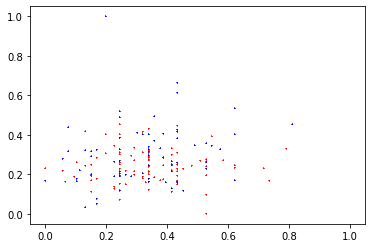

In [63]:
plt.scatter(df0.trestbps,df0.chol,df0.target,marker='+',color='red')
plt.scatter(df1.trestbps,df1.chol,df1.target,marker='+',color='black')
plt.scatter(df2.trestbps,df2.chol,df2.target,marker='+',color='blue')

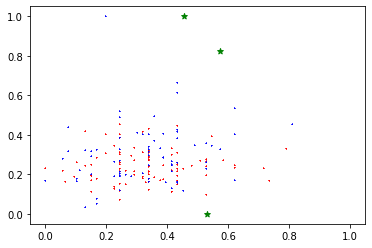

In [64]:
kmeans.cluster_centers_
plt.scatter(df0.trestbps,df0.chol,df0.target,marker='+',color='red')
plt.scatter(df1.trestbps,df1.chol,df1.target,marker='+',color='black')
plt.scatter(df2.trestbps,df2.chol,df2.target,marker='+',color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",color="green")


In [65]:
SSE

[232.1851112401238,
 139.28499683337847,
 97.94066824677498,
 77.20992531990987,
 66.48999675890882,
 61.10132890938165,
 53.25286416081011,
 48.911201105283226,
 46.61215924257788]